In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
from scipy import stats
import sklearn
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Loading the file
df = pd.read_csv('practice-datasets/Auto Sales data.csv', parse_dates=['ORDERDATE'], dayfirst=True)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,NaN,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,NaN,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,NaN,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [3]:
df.shape

(2747, 20)

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,NaN,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,NaN,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
163,10276,50,192.62,3,9631.00,2019-08-02,467,Shipped,Classic Cars,194,S12_1099,Online Mini Collectables,6175557555,7635 Spinnaker Dr.,Brickhaven,58339,USA,Barajas,Miguel,Large
190,10306,31,211.96,13,6570.76,2019-10-14,421,Shipped,Classic Cars,207,S12_1108,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Medium
1531,10375,23,106.23,9,2443.29,2020-02-03,1650,Shipped,Motorcycles,76,S24_2000,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
1478,10328,47,87.54,14,4114.38,2019-11-12,1680,Shipped,Planes,109,S24_1785,Rovelli Gifts,035-640555,Via Ludovico il Moro 22,Bergamo,24100,Italy,Rovelli,Giovanni,Medium
2449,10273,21,102.20,14,2146.20,2019-07-21,2765,Shipped,Ships,86,S700_1938,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,B-1180,Belgium,Dewey,Catherine,Small


In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2746 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2746 non-null   float64       
 5   ORDERDATE             2746 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2744 non-null   object        
 8   PRODUCTLINE           2743 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2746 non-null   object        
 12  PHONE                 2746 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2746.000000,2747.000000,2746.000000,2746,2747.000000,2747.000000
mean,10259.761558,35.103021,101.105448,6.491081,3553.641584,2019-05-13 20:16:04.894391808,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.727500,3.000000,2205.100000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4505.547500,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.048828,4.230544,1839.025236,NaN,819.280576,40.114802


In [8]:
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [9]:
# Missing Values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               1
ORDERLINENUMBER         0
SALES                   1
ORDERDATE               1
DAYS_SINCE_LASTORDER    0
STATUS                  3
PRODUCTLINE             4
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            1
PHONE                   1
ADDRESSLINE1            0
CITY                    5
POSTALCODE              0
COUNTRY                 1
CONTACTLASTNAME         1
CONTACTFIRSTNAME        0
DEALSIZE                3
dtype: int64

In [10]:
# Duplicate Values
df.duplicated().sum()

0

In [11]:
# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
from datetime import datetime

temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828.0
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756.0
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701.0
3,10145,45,NaN,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,646.0
4,10168,36,96.66,1,3479.76,2018-10-28,NaN,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,28034,Spain,Freyre,Diego,Small,182.0
2743,10373,29,137.19,1,3978.51,2020-01-31,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,NaN,Pirkko,Medium,122.0
2744,10386,43,125.99,4,5417.57,2020-03-01,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,92.0
2745,10397,34,62.24,1,2116.16,2020-03-28,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,65.0


In [12]:
df=df.dropna()
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828.0
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756.0
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701.0
5,10180,29,86.13,9,2497.77,2018-11-11,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small,568.0
7,10211,41,114.84,14,4708.44,2019-01-15,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium,503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,10283,33,51.32,12,1693.56,2019-08-20,Shipped,Ships,54,S72_3212,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,Lincoln,Elizabeth,Small,286.0
2739,10315,40,55.69,5,2227.60,2019-10-29,Shipped,Ships,54,S72_3212,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small,216.0
2740,10327,37,86.74,4,3209.38,2019-11-10,Resolved,Ships,54,S72_3212,Danish Wholesale Imports,31 12 3555,Vinb'ltet 34,Kobenhavn,1734,Denmark,Petersen,Jytte,Medium,204.0
2744,10386,43,125.99,4,5417.57,2020-03-01,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,92.0


# Numerical Features

In [13]:
#Since ORDERNUMBER is not relevant for the EDA here, we will drop for Exploratory data analysis & visualizations
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


In [14]:
round(df_num.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2725.0,35.11,9.77,6.00,27.0,35.00,43.00,97.00
PRICEEACH,2725.0,101.14,42.01,26.88,68.8,95.55,127.13,252.87
ORDERLINENUMBER,2725.0,6.50,4.23,1.00,3.0,6.00,9.00,18.00
SALES,2725.0,3556.24,1841.31,482.13,2204.6,3184.94,4509.08,14082.80
MSRP,2725.0,100.79,40.05,33.00,68.0,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2725.0,384.22,230.37,1.00,197.0,343.00,571.00,877.00


# Categorical Features

In [15]:
#We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


In [16]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
STATUS,2725,6,Shipped,2521
PRODUCTLINE,2725,7,Classic Cars,947
PRODUCTCODE,2725,109,S18_3232,51
CUSTOMERNAME,2725,89,Euro Shopping Channel,257
PHONE,2725,88,(91) 555 94 44,257
ADDRESSLINE1,2725,89,"C/ Moralzarzal, 86",257
CITY,2725,71,Madrid,301
POSTALCODE,2725,73,28034,257
COUNTRY,2725,19,USA,919
CONTACTLASTNAME,2725,76,Freyre,257


In [17]:
# Missing Values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

# Univariate Analysis

# Countplot

In [18]:
df.STATUS.value_counts()

STATUS
Shipped       2521
Cancelled       59
Resolved        47
On Hold         43
In Process      41
Disputed        14
Name: count, dtype: int64

Text(0, 0.5, 'Count')

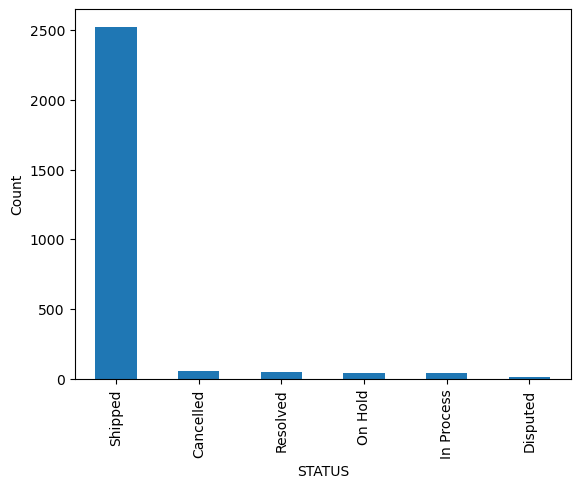

In [19]:
df.STATUS.value_counts().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

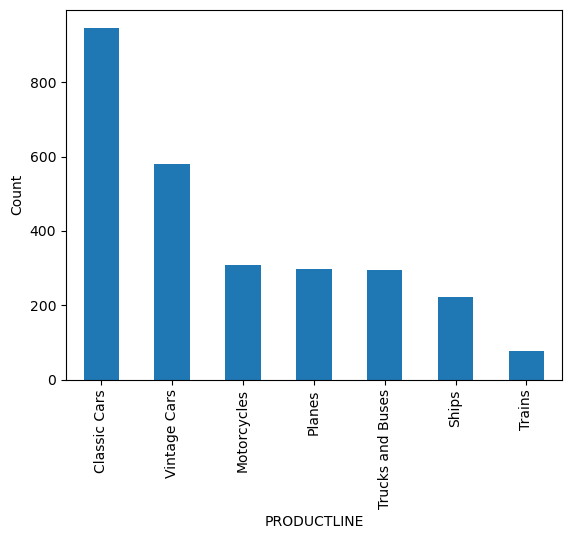

In [20]:
df.PRODUCTLINE.value_counts().plot(kind='bar')
plt.ylabel('Count')

# Piechart

(-1.0999995058402978,
 1.0999910154127033,
 -1.0999996313506222,
 1.0999999824452678)

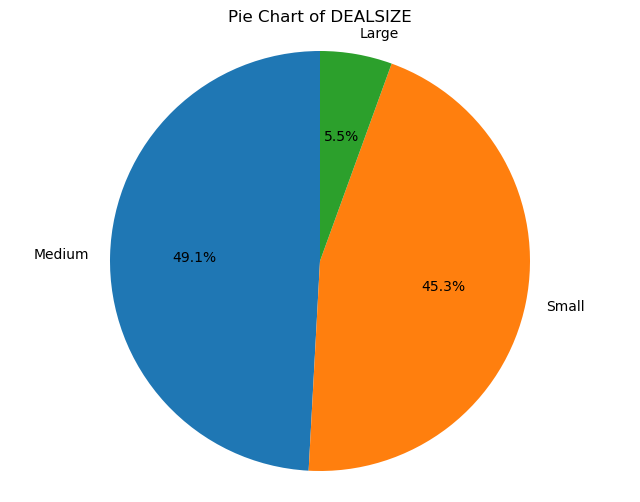

In [21]:
# Count occurrences of each category
category_counts = df['DEALSIZE'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of DEALSIZE')

# Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2725.000000
mean       35.113761
std         9.769531
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


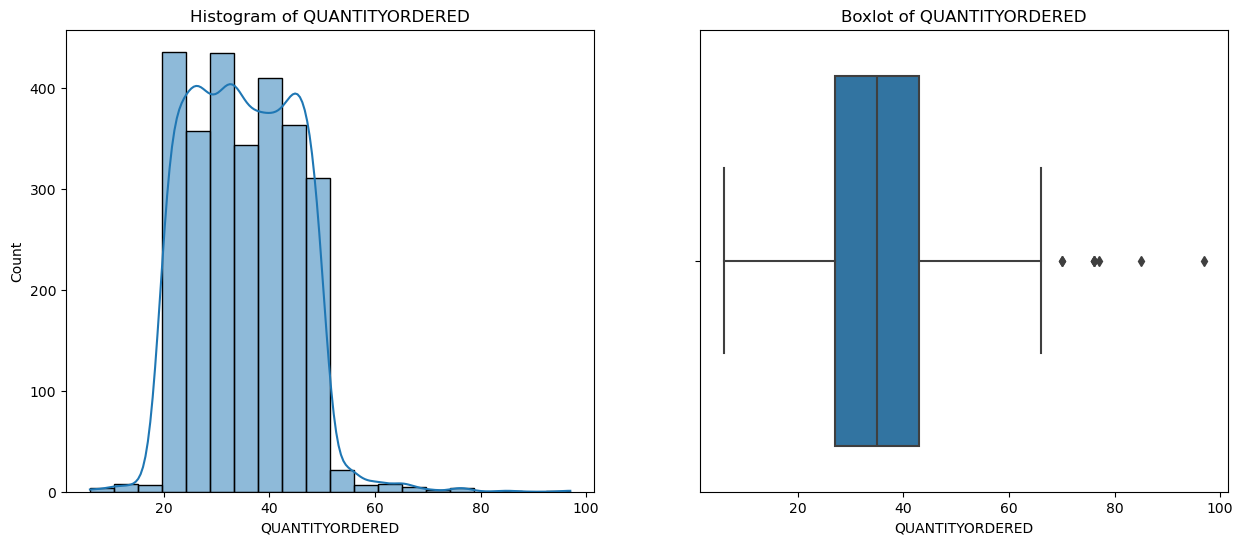

Description of PRICEEACH
----------------------------------------------------------------------------
count    2725.000000
mean      101.142055
std        42.007532
min        26.880000
25%        68.800000
50%        95.550000
75%       127.130000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


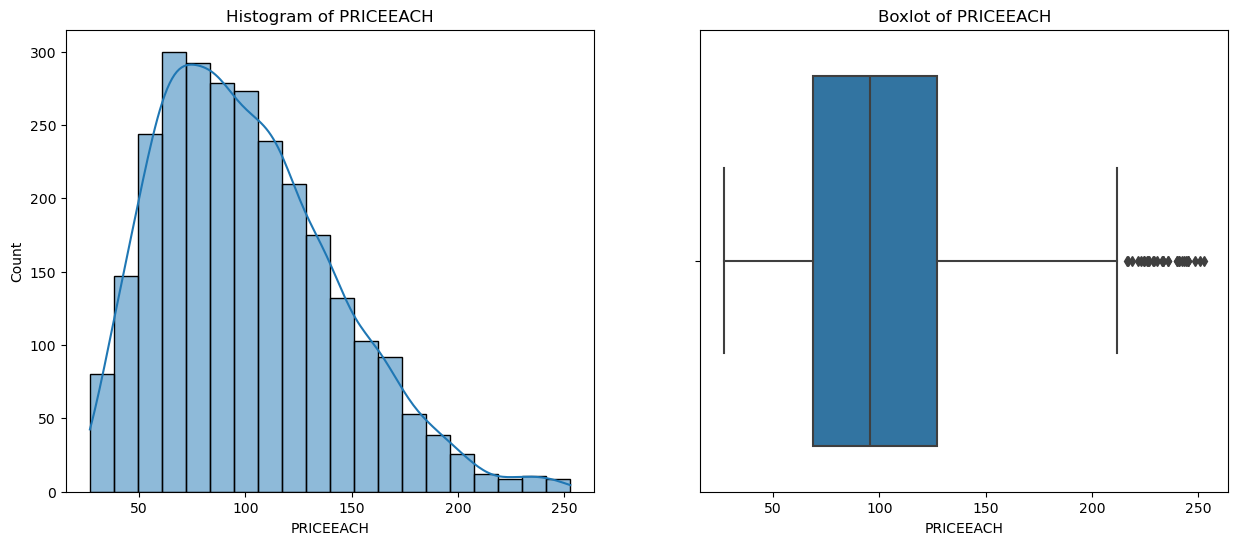

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2725.000000
mean        6.500917
std         4.229175
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


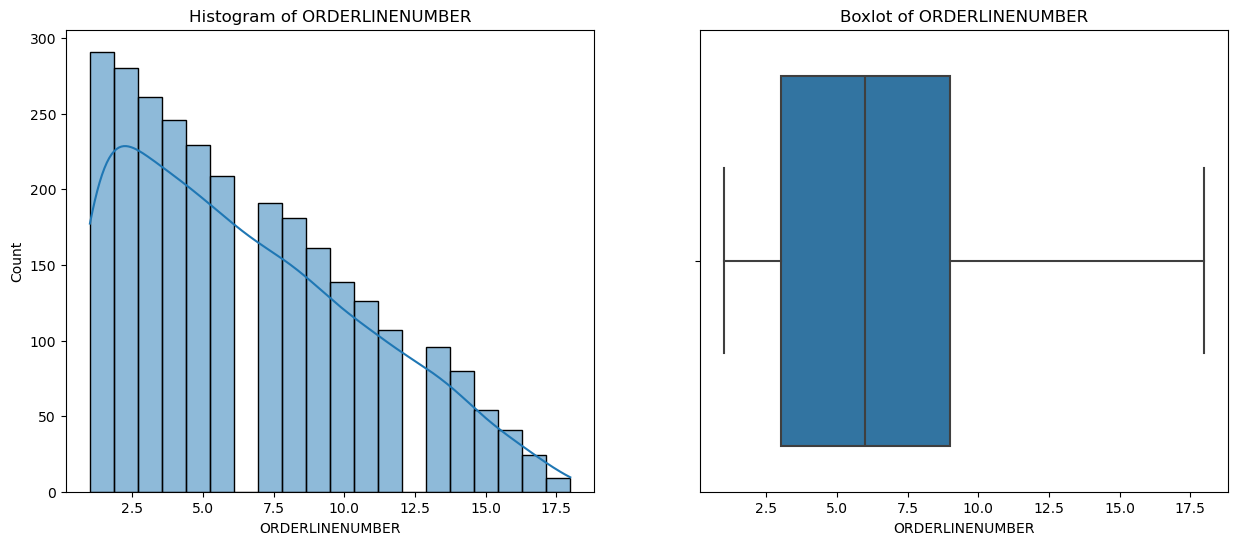

Description of SALES
----------------------------------------------------------------------------
count     2725.000000
mean      3556.243013
std       1841.307172
min        482.130000
25%       2204.600000
50%       3184.940000
75%       4509.080000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


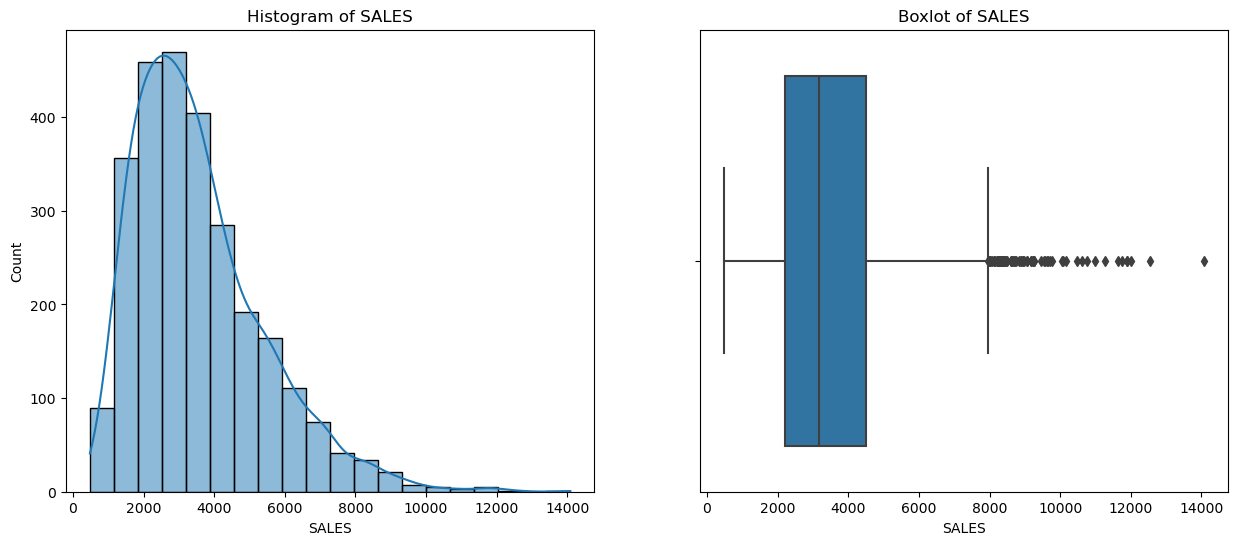

Description of MSRP
----------------------------------------------------------------------------
count    2725.000000
mean      100.788257
std        40.046709
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


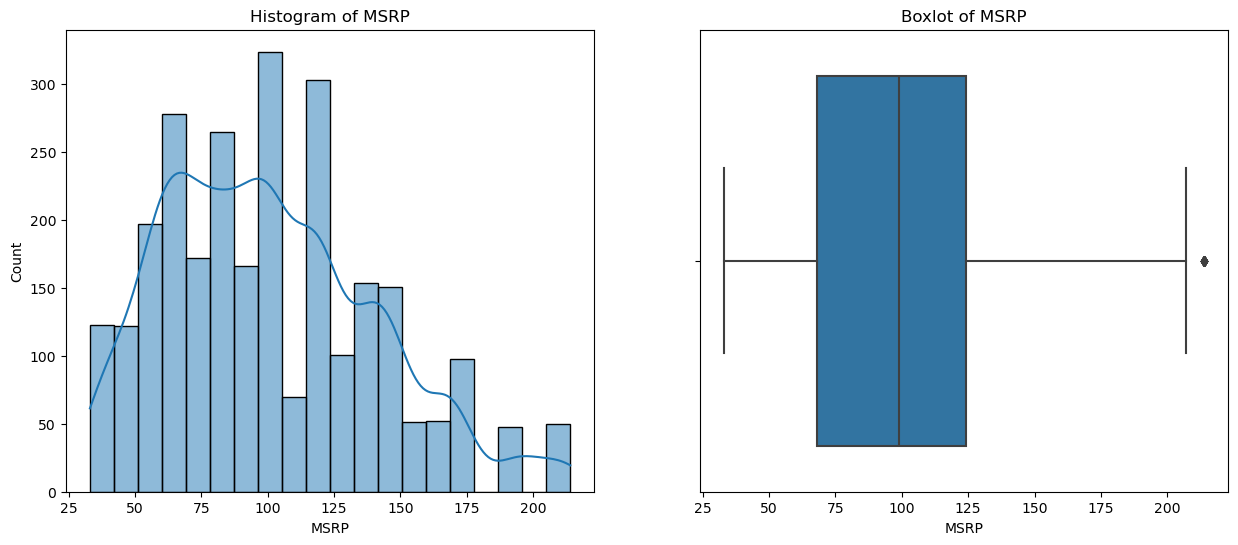

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2725.000000
mean      384.218716
std       230.369712
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


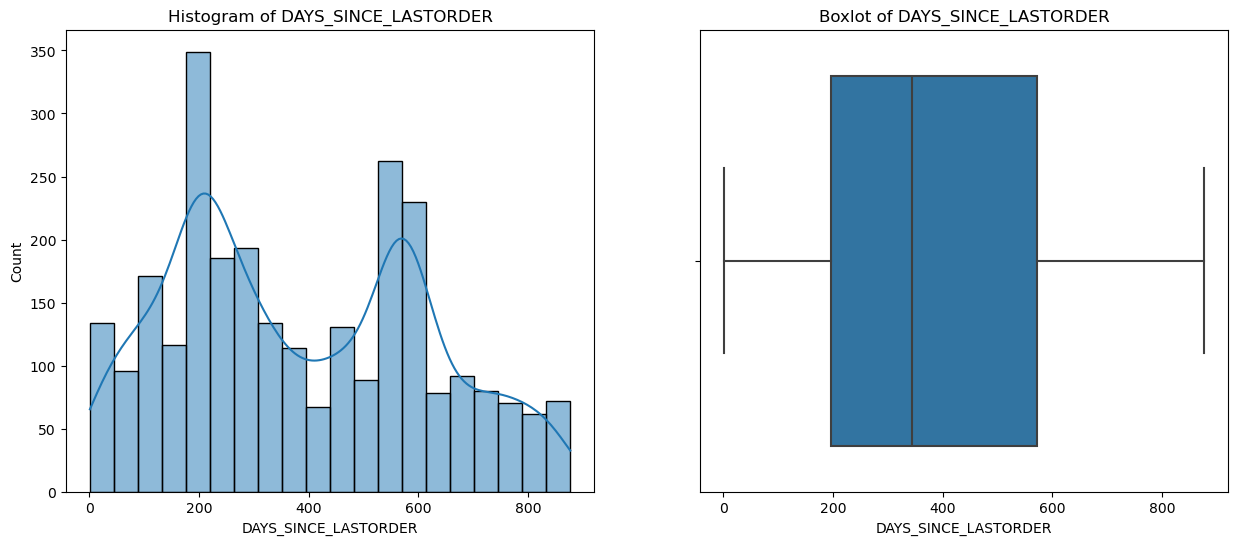

In [22]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)

<Axes: xlabel='PRICEEACH', ylabel='QUANTITYORDERED'>

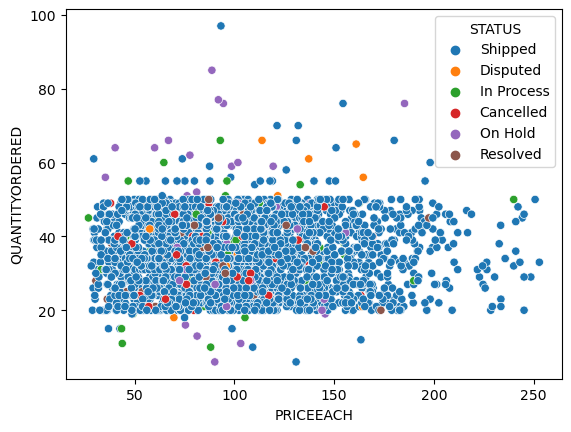

In [23]:
sns.scatterplot(x=df['PRICEEACH'], y=df['QUANTITYORDERED'],hue=df['STATUS'])


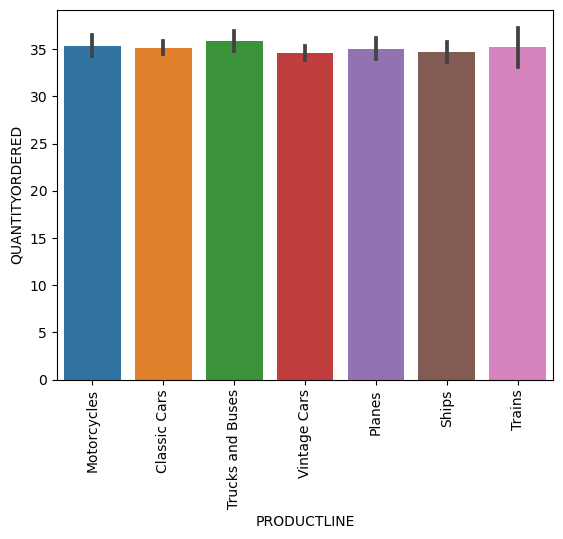

In [24]:
sns.barplot(x=df['PRODUCTLINE'], y=df['QUANTITYORDERED'])
plt.xticks(rotation=90)
plt.show()

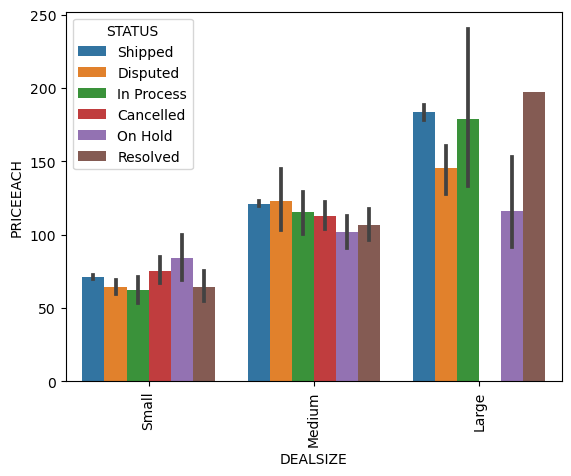

In [25]:
sns.barplot(x=df['DEALSIZE'], y=df['PRICEEACH'],hue=df['STATUS'])
plt.xticks(rotation=90)
plt.show()

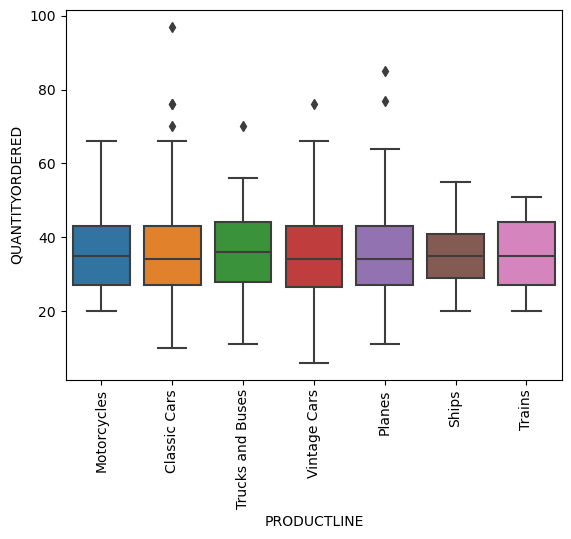

In [26]:
sns.boxplot(x=df['PRODUCTLINE'], y=df['QUANTITYORDERED'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='SALES', ylabel='Density'>

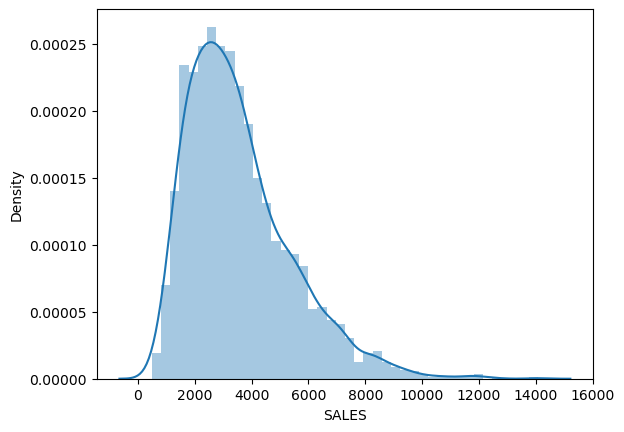

In [27]:
sns.distplot(df['SALES'])

<Axes: xlabel='PRODUCTLINE', ylabel='STATUS'>

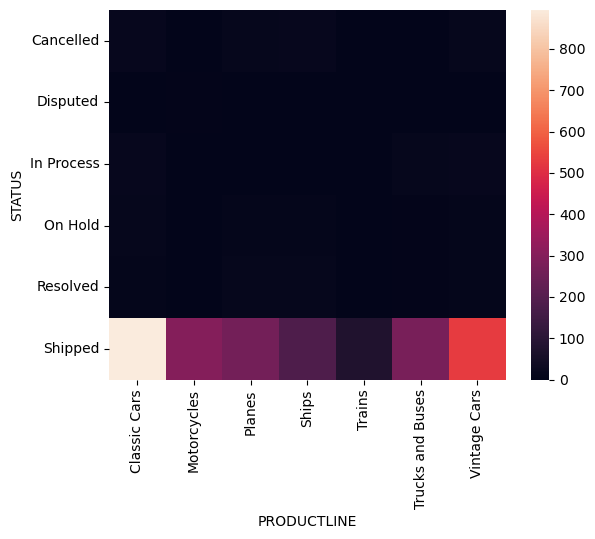

In [28]:
#heatmap
sns.heatmap(pd.crosstab(df['STATUS'],df['PRODUCTLINE']))

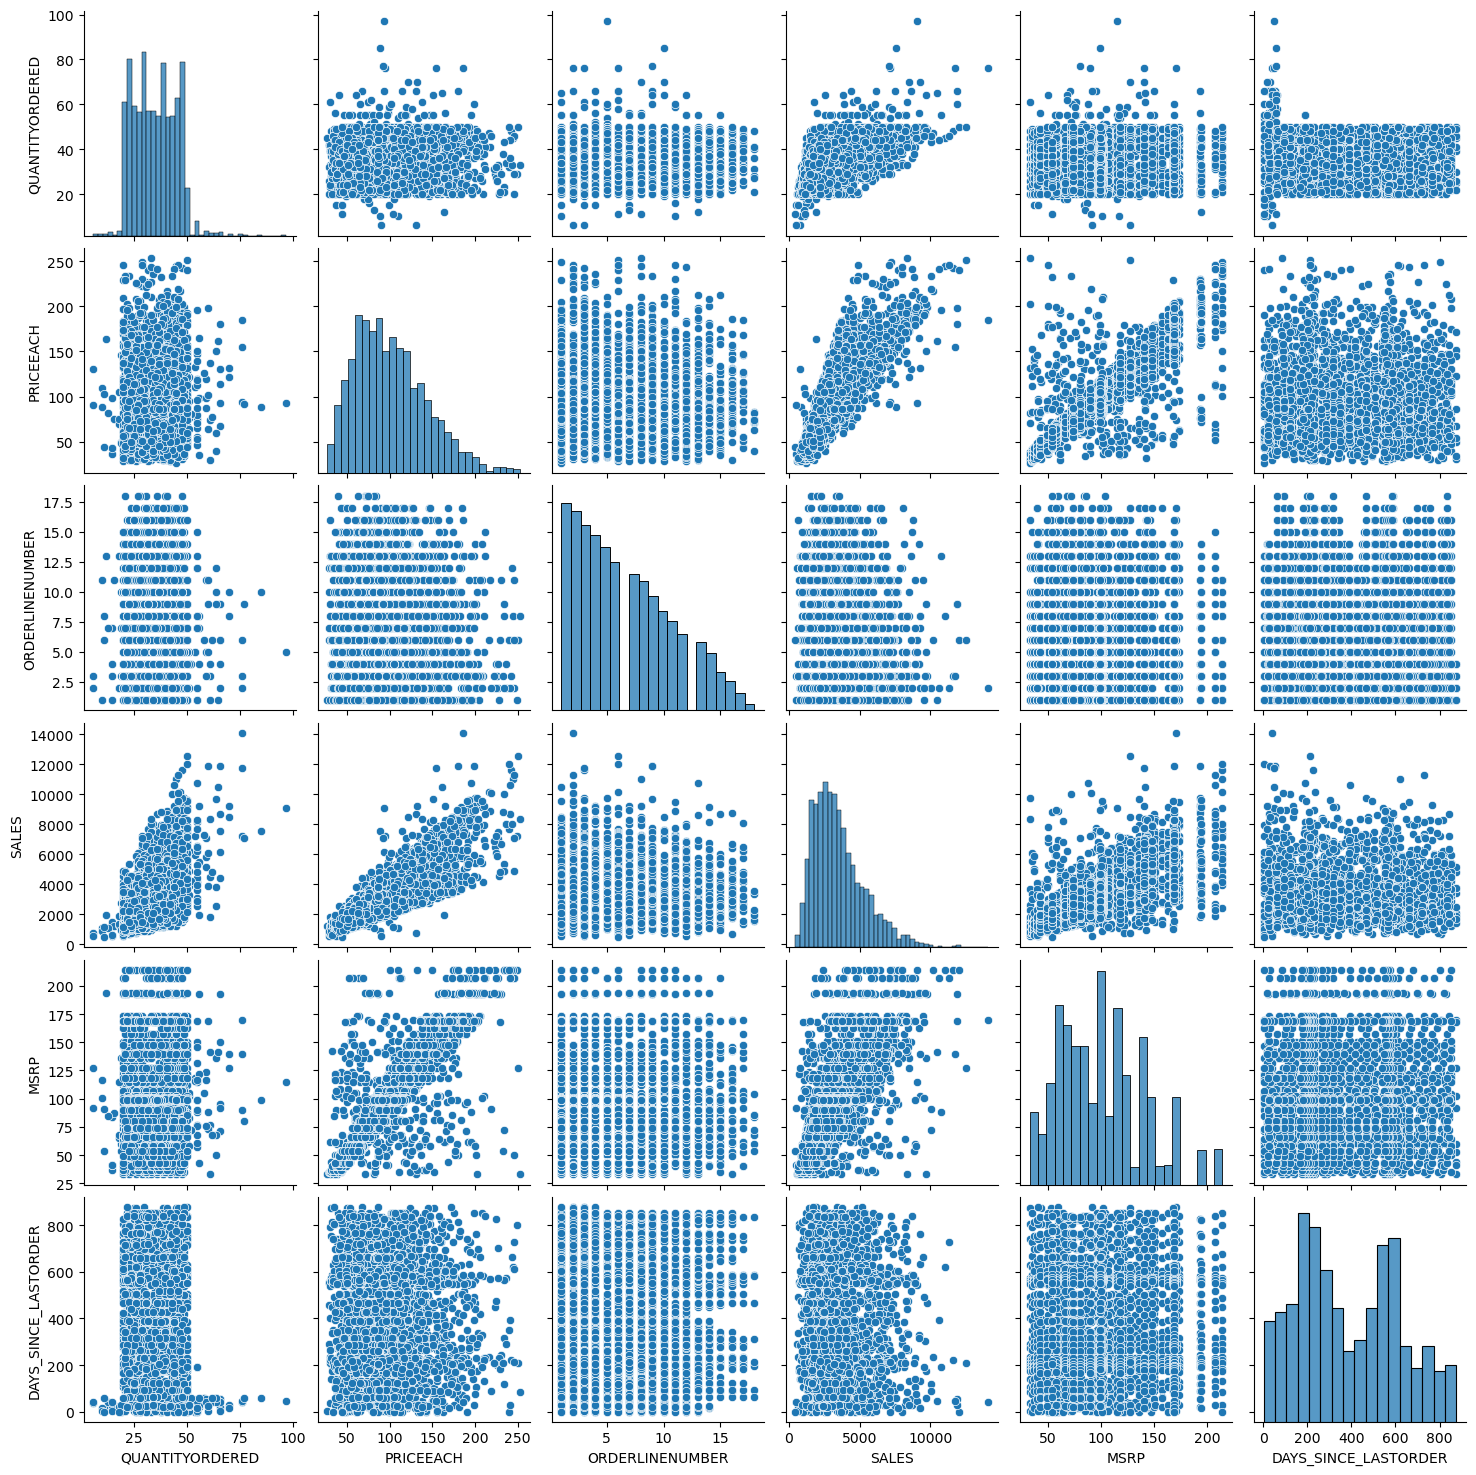

In [30]:
sns.pairplot(df_num)

In [ ]:
# Detect outliers using IQR method


# Column to check for outliers
column = 'SALES'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Print Q1, Q3, and IQR values
print(f"Q1 (25th percentile) of {column}: {Q1}")
print(f"Q3 (75th percentile) of {column}: {Q3}")
print(f"IQR (Interquartile Range) of {column}: {IQR}")


# Identify outliers
outliers_iqr = df[column][((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

print("Outliers using IQR method:")
print(outliers_iqr)

In [ ]:
# Z-score method to detect outliers

column = 'QUANTITYORDERED'

# Convert the column to a numpy array, excluding NaN values
column_np = df[column].dropna().to_numpy()

# Calculate mean and standard deviation
mean = np.mean(column_np)
std_dev = np.std(column_np)

# Print mean and standard deviation
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")



In [ ]:
# Calculate Z-scores
z_scores = stats.zscore(column_np)

# Print Z-scores
print(f"Z-scores: {z_scores}")

In [ ]:

# Identify outliers (using a threshold of 3)
threshold = 3
outliers = column_np[np.abs(z_scores) > threshold]

print("Outliers using Z-score method:")
print(outliers)

In [ ]:
np.abs(z_scores)

In [ ]:
# Z-score method to detect outliers (direct and short way)
# Column to check for outliers
column = 'QUANTITYORDERED'

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[column].dropna()))

# Set a threshold (commonly 3)
threshold = 3

# Identify outliers
outliers = df[column][(z_scores > threshold)]

print("Outliers using Z-score method:")
print(outliers)

In [ ]:
# Filter out the outliers
df_cleaned_zscore = df[(np.abs(stats.zscore(df[column].dropna())) <= threshold) | df[column].isna()]

print("Dataset after removing outliers using Z-score method:")
print(df_cleaned_zscore[column])